# 1. PosteriorDB

See https://arxiv.org/abs/2407.04967v1

In [1]:
import os
from functools import partial

import jax.scipy.linalg
from flax.nnx import state
from posteriordb import PosteriorDatabase
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pdb_path = os.path.join(os.environ["MCMC_WORKDIR"], "posteriordb/posterior_database")
my_pdb = PosteriorDatabase(pdb_path)

In [3]:
posterior = my_pdb.posterior("diamonds-diamonds")

p_model = posterior.model
p_data = posterior.data

## 1.1. Accessing the data

In [4]:
p_data.information

{'name': 'diamonds',
 'keywords': ['ggplot2', 'tidyverse'],
 'title': 'Diamonds data frame for brms generated by brms::make_standata',
 'description': 'ggplot2 Diamonds data set for brms',
 'urls': 'https://github.com/bbbales2/cmdstan-warmup/blob/develop/examples/diamonds',
 'references': 'wickham2016ggplot2',
 'added_date': '2020-02-01',
 'added_by': 'Oliver Järnefelt'}

In [5]:
print(p_data.information["description"])

ggplot2 Diamonds data set for brms


In [6]:
values_dict = p_data.values()
for key, vals in values_dict.items():
    print(f"{key}: {type(vals)}")

N: <class 'int'>
Y: <class 'list'>
K: <class 'int'>
X: <class 'list'>
prior_only: <class 'int'>


In [7]:
data = {key: np.array(val) for key, val in values_dict.items() if type(val) is list}
data_rest = {key: val for key, val in values_dict.items() if type(val) is not list}

In [8]:
np.corrcoef(data["X"][:, 1:5], rowvar=False)

array([[1.        , 0.95446348, 0.95346272, 0.95273646],
       [0.95446348, 1.        , 0.99863518, 0.99161406],
       [0.95346272, 0.99863518, 1.        , 0.99145969],
       [0.95273646, 0.99161406, 0.99145969, 1.        ]])

(array([  5.,  32.,  18.,  30.,  28.,  20., 105., 242., 273., 161., 112.,
         88., 136., 156., 134.,  49.,  48.,  85., 194., 129., 122.,  82.,
         48.,  42., 134., 222., 135.,  96.,  54., 109., 117., 149., 232.,
        192., 144., 144., 127., 103.,  69.,  60.,  83., 106.,  94.,  49.,
         29.,  23.,  23.,  45.,  47.,  31.,  15.,  15.,   9.,   0.,   2.,
          0.,   1.,   1.,   0.,   1.]),
 array([1.34547237, 1.36118926, 1.37690616, 1.39262306, 1.40833995,
        1.42405685, 1.43977375, 1.45549064, 1.47120754, 1.48692444,
        1.50264133, 1.51835823, 1.53407513, 1.54979202, 1.56550892,
        1.58122582, 1.59694271, 1.61265961, 1.62837651, 1.6440934 ,
        1.6598103 , 1.6755272 , 1.69124409, 1.70696099, 1.72267789,
        1.73839478, 1.75411168, 1.76982858, 1.78554547, 1.80126237,
        1.81697927, 1.83269616, 1.84841306, 1.86412996, 1.87984685,
        1.89556375, 1.91128065, 1.92699754, 1.94271444, 1.95843134,
        1.97414823, 1.98986513, 2.00558203, 2.

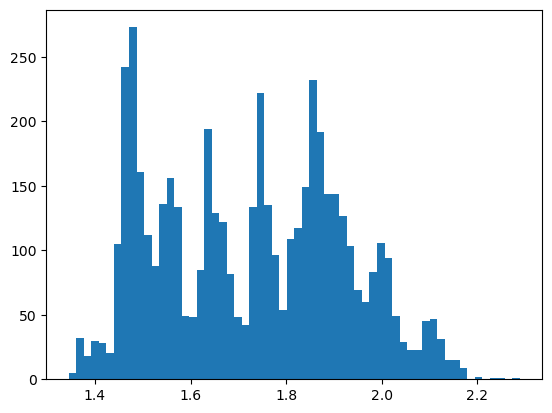

In [9]:
plt.hist(data["X"][:, 2], bins=60)

(array([ 13.,  28.,  51.,  67.,  72.,  90., 117., 126., 162., 140., 152.,
        164., 150., 131., 106., 106.,  92.,  90.,  56., 121., 141., 102.,
        110., 106., 113., 120., 115.,  90.,  97., 111., 147., 163., 136.,
        164., 116., 115., 112.,  93., 101.,  84.,  65.,  76.,  69.,  72.,
         60.,  51.,  52.,  63.,  60.,  62.]),
 array([5.87773578, 5.95700799, 6.0362802 , 6.1155524 , 6.19482461,
        6.27409682, 6.35336903, 6.43264123, 6.51191344, 6.59118565,
        6.67045786, 6.74973006, 6.82900227, 6.90827448, 6.98754669,
        7.06681889, 7.1460911 , 7.22536331, 7.30463552, 7.38390772,
        7.46317993, 7.54245214, 7.62172435, 7.70099655, 7.78026876,
        7.85954097, 7.93881318, 8.01808538, 8.09735759, 8.1766298 ,
        8.25590201, 8.33517421, 8.41444642, 8.49371863, 8.57299084,
        8.65226304, 8.73153525, 8.81080746, 8.89007967, 8.96935187,
        9.04862408, 9.12789629, 9.2071685 , 9.2864407 , 9.36571291,
        9.44498512, 9.52425733, 9.60352953, 9.

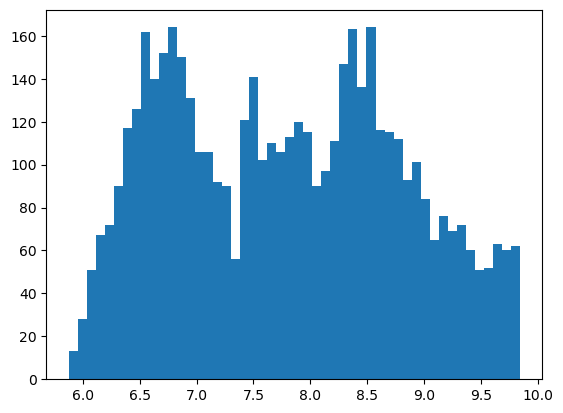

In [10]:
plt.hist(data["Y"], bins=50)

## 1.2. Accessing the model

In [11]:
p_model.information

{'name': 'diamonds',
 'keywords': ['stan_benchmark', 'linear regression'],
 'title': 'Multiple Highly Correlated Predictors Log-Log Model',
 'prior': {'keywords': 'stan_recommended_35dbfe6'},
 'description': 'log(price) ~ carat * (log(x) + log(y) + log(z)) + cut + color + clarity',
 'urls': 'https://github.com/bbbales2/cmdstan-warmup/blob/develop/examples/diamonds',
 'references': 'bales2019selecting',
 'added_date': '2020-02-01',
 'added_by': 'Oliver Järnefelt'}

In [12]:
print(p_model.stan_code())

// generated with brms 2.10.0

functions {
  
}
data {
  int<lower=1> N; // number of observations
  vector[N] Y; // response variable
  int<lower=1> K; // number of population-level effects
  matrix[N, K] X; // population-level design matrix
  int prior_only; // should the likelihood be ignored?
}
transformed data {
  int Kc = K - 1;
  matrix[N, Kc] Xc; // centered version of X without an intercept
  vector[Kc] means_X; // column means of X before centering
  for (i in 2 : K) {
    means_X[i - 1] = mean(X[ : , i]);
    Xc[ : , i - 1] = X[ : , i] - means_X[i - 1];
  }
}
parameters {
  vector[Kc] b; // population-level effects
  // temporary intercept for centered predictors
  real Intercept;
  real<lower=0> sigma; // residual SD
}
transformed parameters {
  
}
model {
  // priors including all constants
  target += normal_lpdf(b | 0, 1);
  target += student_t_lpdf(Intercept | 3, 8, 10);
  target += student_t_lpdf(sigma | 3, 0, 10)
            - 1 * student_t_lccdf(0 | 3, 0, 10);
  // l

## 1.3. Accessing the posterior

In [13]:
posterior.information

{'keywords': ['stan benchmark', 'linear regression', 'pathfinder paper'],
 'urls': 'https://github.com/bbbales2/cmdstan-warmup/blob/develop/examples/diamonds',
 'references': ['bales2019selecting', 'wickham2016ggplot2'],
 'dimensions': {'b': 24, 'Intercept': 1, 'sigma': 1},
 'added_date': '2020-02-01',
 'added_by': 'Oliver Järnefelt'}

In [14]:
posterior.name

'diamonds-diamonds'

In [15]:
posterior.reference_draws_info()['inference']

{'method': 'stan_sampling',
 'method_arguments': {'chains': 10,
  'iter': 20000,
  'warmup': 10000,
  'thin': 10,
  'seed': 4711,
  'control': {'adapt_delta': 0.99, 'max_treedepth': 20}}}

In [16]:
posterior.reference_draws_info()["diagnostics"]

{'diagnostic_information': {'names': ['b[1]',
   'b[2]',
   'b[3]',
   'b[4]',
   'b[5]',
   'b[6]',
   'b[7]',
   'b[8]',
   'b[9]',
   'b[10]',
   'b[11]',
   'b[12]',
   'b[13]',
   'b[14]',
   'b[15]',
   'b[16]',
   'b[17]',
   'b[18]',
   'b[19]',
   'b[20]',
   'b[21]',
   'b[22]',
   'b[23]',
   'b[24]',
   'Intercept',
   'sigma']},
 'ndraws': 10000,
 'nchains': 10,
 'effective_sample_size_bulk': [9887.7459603498,
  10310.438346761,
  10137.7414052872,
  10136.1230533179,
  10057.2361933595,
  9730.31848970419,
  9574.49918784441,
  9846.43494375318,
  9861.5479075935,
  10118.422678104,
  9964.0802437337,
  10171.9101417965,
  9892.86685555493,
  9628.9211135197,
  9934.00450797643,
  9527.67038371501,
  10105.2621133498,
  10106.4605745892,
  9921.45279461561,
  10165.0651379118,
  10104.7170513001,
  9975.19365420567,
  9976.0976472878,
  10049.5584138559,
  9947.6813758736,
  10051.4476397944],
 'effective_sample_size_tail': [9999.00820858923,
  9911.87449276965,
  9614.38

Convergence diagnostic $\hat{R}$ is used: https://doi.org/10.1214/20-BA1221

Data structure:

[

    {                     - chain1
        param1: [...],
        param2: [...],
        ...
    },
    
    {...},                - chain2,

    ...
    
    {...}                 - chain10
]

In [17]:
posterior.reference_draws()[0].keys()

dict_keys(['b[1]', 'b[2]', 'b[3]', 'b[4]', 'b[5]', 'b[6]', 'b[7]', 'b[8]', 'b[9]', 'b[10]', 'b[11]', 'b[12]', 'b[13]', 'b[14]', 'b[15]', 'b[16]', 'b[17]', 'b[18]', 'b[19]', 'b[20]', 'b[21]', 'b[22]', 'b[23]', 'b[24]', 'Intercept', 'sigma'])

In [18]:
# Combine all chain draws into a single DataFrame and add chain identifier
reference_draws_df = pd.concat([
    pd.DataFrame(chain_draw).assign(chain_id=i)
    for i, chain_draw in enumerate(posterior.reference_draws())
])

# reference_draws_df["step"] = reference_draws_df.index

# Rename beta columns to adjust the indices for later usage
# reference_draws_df.rename(columns={f"beta[{i+1}]": f"beta[{i}]" for i in range(3)}, inplace=True)

reference_draws_df

,b[1],b[2],b[3],b[4],b[5],b[6],b[7],b[8],b[9],b[10],...,b[18],b[19],b[20],b[21],b[22],b[23],b[24],Intercept,sigma,chain_id
0,6.558847,6.105568,-4.492008,1.568187,0.135701,-0.042189,0.024993,0.005900,-0.447776,-0.093153,...,-0.061160,0.019884,-0.007028,0.025016,-5.757860,4.384663,-1.532415,7.792967,0.123401,0
1,6.852109,6.088976,-4.309645,1.302592,0.138684,-0.050193,0.033765,-0.001087,-0.450925,-0.093300,...,-0.048296,0.022392,-0.000269,0.026784,-5.822103,4.250303,-1.427493,7.788057,0.122009,0
2,6.650531,6.013908,-4.449779,1.573739,0.124625,-0.032638,0.019638,-0.004168,-0.446881,-0.101230,...,-0.049002,0.018172,0.006315,0.038363,-5.865965,4.396349,-1.451338,7.789234,0.123128,0
3,6.745017,6.412219,-4.962492,1.620767,0.140603,-0.044739,0.028786,-0.000455,-0.444529,-0.095642,...,-0.052483,0.022589,-0.000317,0.026576,-5.878313,4.555128,-1.685576,7.788277,0.124471,0
4,6.529848,6.296251,-4.852639,1.725669,0.127325,-0.035958,0.021422,-0.002392,-0.446059,-0.098158,...,-0.061284,0.009773,-0.009712,0.029008,-6.053156,4.705672,-1.548416,7.791229,0.123913,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.025499,6.244067,-4.727564,1.473449,0.119349,-0.024811,0.012453,0.002247,-0.444085,-0.097014,...,-0.067020,0.016457,-0.003508,0.031003,-6.246064,4.775748,-1.638362,7.786106,0.124281,9
996,6.368991,6.570109,-4.979740,1.633528,0.129311,-0.037383,0.019042,0.000066,-0.443848,-0.086430,...,-0.067332,0.018883,-0.001965,0.025891,-6.231889,4.953932,-1.550342,7.786309,0.121693,9
997,7.341036,6.242754,-4.952205,1.537745,0.122536,-0.034910,0.019735,0.011126,-0.448693,-0.100573,...,-0.062113,0.019496,-0.003769,0.029488,-6.199628,4.750627,-1.818325,7.787158,0.126018,9
998,6.347526,6.585266,-4.729307,1.398987,0.146274,-0.048597,0.020630,0.004267,-0.453920,-0.091332,...,-0.065856,0.027186,-0.005134,0.031181,-6.160192,4.674922,-1.279399,7.788346,0.122748,9


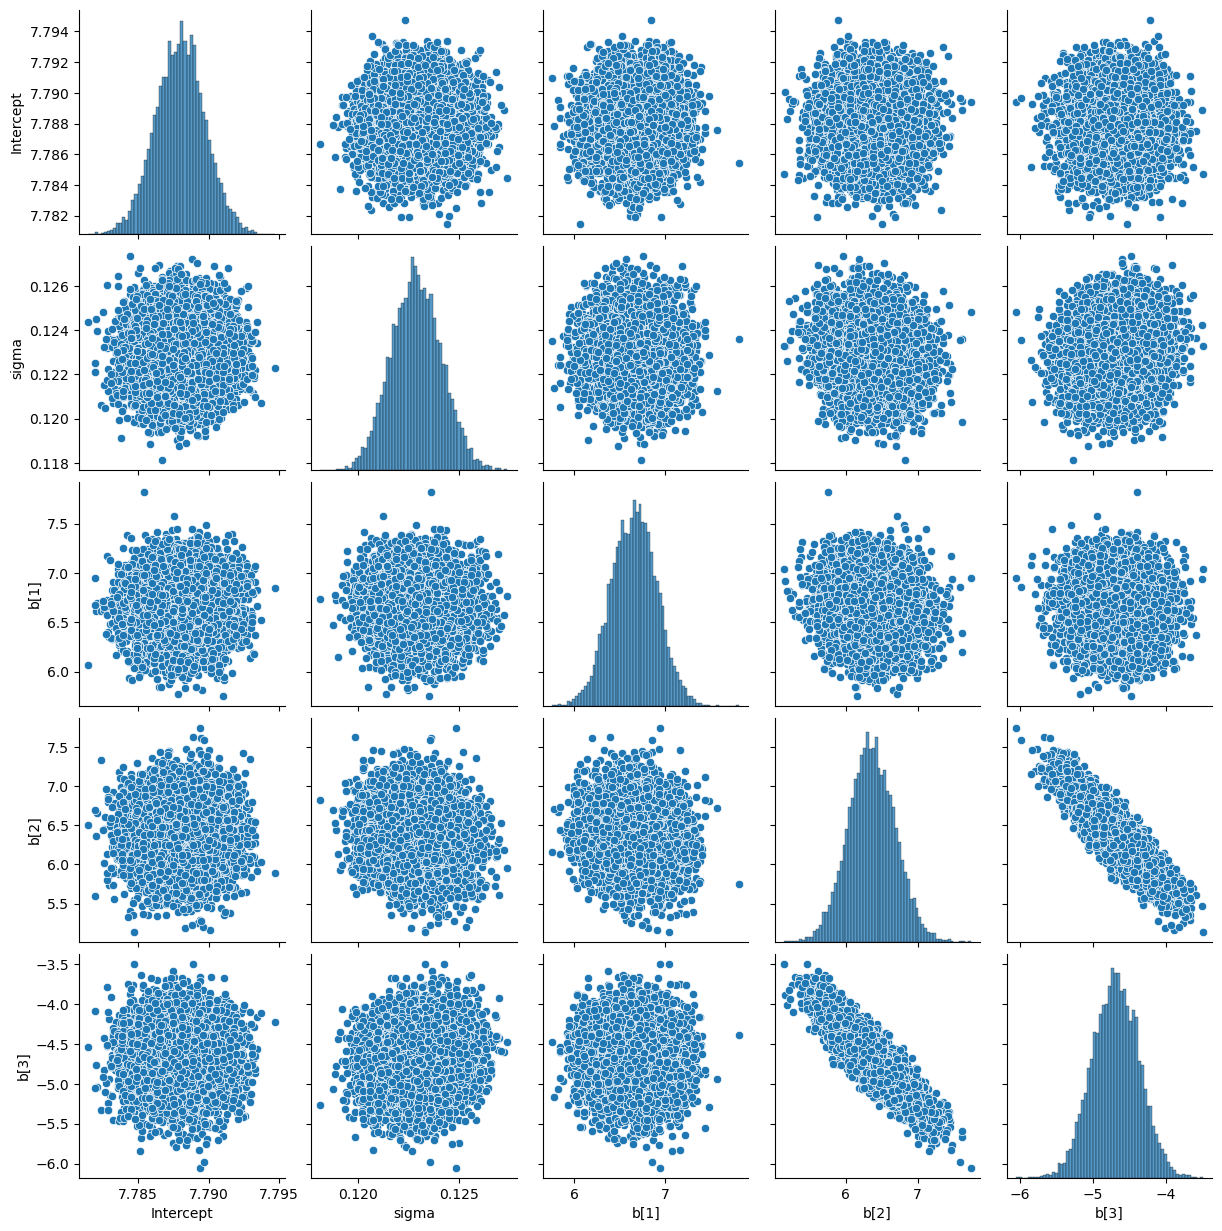

In [19]:
sns.pairplot(reference_draws_df, vars=["Intercept", "sigma", "b[1]", "b[2]", "b[3]"])

In [20]:
reference_draws_df[["b[1]", "b[2]", "b[3]", "b[4]",]].corr()

,b[1],b[2],b[3],b[4]
b[1],1.000000,-0.081815,-0.044581,-0.342822
b[2],-0.081815,1.000000,-0.877678,-0.249164
b[3],-0.044581,-0.877678,1.000000,-0.145911
b[4],-0.342822,-0.249164,-0.145911,1.000000


In [21]:
# sns.scatterplot(reference_draws_df, x=reference_draws_df.index, y="sigma", marker='.')

In [47]:
svg_dir = f"{os.environ['MCMC_WORKDIR']}/img/svg/"

# 2. NumPyro

See https://num.pyro.ai/en/latest/index.html

In [23]:
import numpyro
import numpyro.distributions as dist
from numpyro.infer.inspect import render_model
from jax import random
import jax.numpy as jnp
import numpyro.infer as infer


In [24]:
reference_draws_df.columns

Index(['b[1]', 'b[2]', 'b[3]', 'b[4]', 'b[5]', 'b[6]', 'b[7]', 'b[8]', 'b[9]',
       'b[10]', 'b[11]', 'b[12]', 'b[13]', 'b[14]', 'b[15]', 'b[16]', 'b[17]',
       'b[18]', 'b[19]', 'b[20]', 'b[21]', 'b[22]', 'b[23]', 'b[24]',
       'Intercept', 'sigma', 'chain_id'],
      dtype='object')

In [25]:
reference_draws = {
    "b": jnp.array(reference_draws_df[[f"b[{i}]" for i in range(1,25)]]),
    "Intercept": jnp.array(reference_draws_df["Intercept"]),
    "sigma": jnp.array(reference_draws_df["sigma"])
}

In [26]:
data["X"].shape

(5000, 25)

## 2.1. Specifying the model

In [27]:
print(p_model.stan_code())

// generated with brms 2.10.0

functions {
  
}
data {
  int<lower=1> N; // number of observations
  vector[N] Y; // response variable
  int<lower=1> K; // number of population-level effects
  matrix[N, K] X; // population-level design matrix
  int prior_only; // should the likelihood be ignored?
}
transformed data {
  int Kc = K - 1;
  matrix[N, Kc] Xc; // centered version of X without an intercept
  vector[Kc] means_X; // column means of X before centering
  for (i in 2 : K) {
    means_X[i - 1] = mean(X[ : , i]);
    Xc[ : , i - 1] = X[ : , i] - means_X[i - 1];
  }
}
parameters {
  vector[Kc] b; // population-level effects
  // temporary intercept for centered predictors
  real Intercept;
  real<lower=0> sigma; // residual SD
}
transformed parameters {
  
}
model {
  // priors including all constants
  target += normal_lpdf(b | 0, 1);
  target += student_t_lpdf(Intercept | 3, 8, 10);
  target += student_t_lpdf(sigma | 3, 0, 10)
            - 1 * student_t_lccdf(0 | 3, 0, 10);
  // l

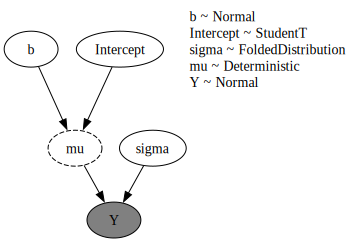

In [49]:

def model(X, Y=None):
    # Data transformation
    N, K = X.shape
    Kc = K - 1
    means_X = jnp.mean(X[:, 1:], axis=0)  # Means of columns excluding the first (intercept)
    Xc = jnp.column_stack([X[:, 0], X[:, 1:] - means_X])  # Center the predictors

    # Priors
    b = numpyro.sample("b", dist.Normal(loc=0, scale=1), sample_shape=(Kc, ))
    Intercept = numpyro.sample("Intercept", dist.StudentT(df=3, loc=8, scale=10))
    sigma = numpyro.sample("sigma", dist.FoldedDistribution(dist.StudentT(df=3, loc=0, scale=10)))
    # sigma = numpyro.deterministic("sigma", jnp.abs(sigma_base))

    # Likelihood
    mu = numpyro.deterministic("mu", Intercept + jnp.dot(Xc[:, 1:], b))
    # mu = Intercept + jnp.dot(Xc[:, 1:], b)# Linear predictor without intercept from Xc
    numpyro.sample("Y", dist.Normal(mu, sigma), obs=Y)

render_model(model, model_kwargs=data, render_distributions=True, filename=svg_dir+"model_diamonds.svg")

In [29]:
def get_intercept(b, Intercept, sigma, **rest_kwargs):
    means_X = jnp.mean(data["X"][:, 1:], axis=0)
    b_Intercept = Intercept - jnp.dot(means_X, b)
    return b_Intercept

ref_intercept = jax.vmap(get_intercept)(**reference_draws).mean()
ref_intercept

Array(1.4285461, dtype=float32)

In [30]:
 def get_pes(param_draws):
    leaves, treedef = jax.tree.flatten(param_draws)
    
    @jax.jit
    def pe_model(*leaves):
        params = jax.tree.unflatten(treedef, leaves)
        log_density, _ = infer.util.log_density(model, model_args=(), model_kwargs=data, params=params)
        return -log_density
    
    pes = jax.vmap(pe_model)(*leaves)
    return pes

In [31]:
pe_offset = -jax.nn.logsumexp(-get_pes(reference_draws))

get_offsetted_pes = lambda param_draws: get_pes(param_draws) - pe_offset

In [32]:
ref_pes = get_offsetted_pes(reference_draws)
reference_draws_df["potential_energy"] = ref_pes

<Axes: xlabel='potential_energy', ylabel='Count'>

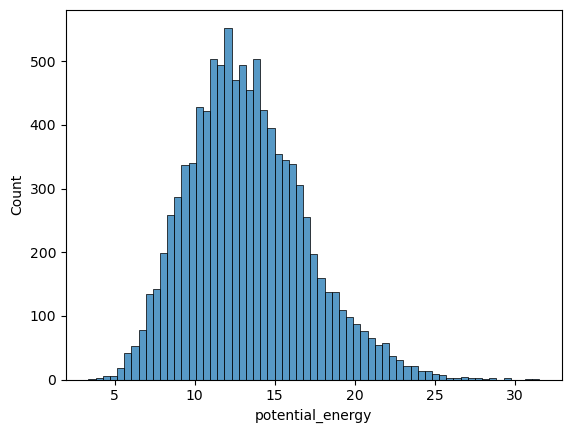

In [33]:
sns.histplot(reference_draws_df, x="potential_energy")

In [34]:
reference_draws

{'b': Array([[ 6.558847 ,  6.105568 , -4.4920077, ..., -5.7578597,  4.3846636,
         -1.5324149],
        [ 6.852109 ,  6.0889754, -4.309645 , ..., -5.822103 ,  4.2503033,
         -1.4274926],
        [ 6.6505313,  6.0139084, -4.4497795, ..., -5.865965 ,  4.3963485,
         -1.4513376],
        ...,
        [ 7.341036 ,  6.2427545, -4.952205 , ..., -6.1996274,  4.7506266,
         -1.8183247],
        [ 6.347526 ,  6.585266 , -4.7293067, ..., -6.160192 ,  4.674922 ,
         -1.2793987],
        [ 6.7566953,  6.41075  , -4.695697 , ..., -6.091759 ,  4.599486 ,
         -1.4736066]], dtype=float32),
 'Intercept': Array([7.792967 , 7.7880573, 7.7892337, ..., 7.7871575, 7.7883463,
        7.7834735], dtype=float32),
 'sigma': Array([0.12340134, 0.1220094 , 0.12312824, ..., 0.12601803, 0.12274839,
        0.12300412], dtype=float32)}

In [35]:
ref_intercepts, ref_bs, ref_sigmas = jax.tree.leaves(reference_draws)

@jax.jit
def get_ecc(intercept, b, sigma):
    ecc_intercept = jnp.abs(intercept[None] - ref_intercepts).mean(axis=0)
    ecc_b = jnp.linalg.vector_norm(b[None] - ref_bs, axis=1).mean(axis=0)
    ecc_sigma = jnp.abs(jnp.log(sigma)[None] - jnp.log(ref_sigmas)).mean(axis=0)
    
    return ecc_b + ecc_intercept + ecc_sigma

In [36]:
ref_eccs = jax.vmap(get_ecc)(*jax.tree.leaves(reference_draws))
reference_draws_df["eccentricity"] = ref_eccs

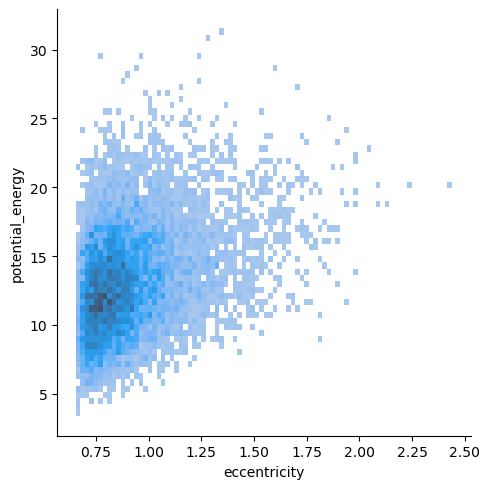

In [37]:
sns.displot(reference_draws_df, x="eccentricity", y="potential_energy")

## 2.2. Specifying the kernel

Or use Sample Adaptive MCMC kernel from https://proceedings.neurips.cc/paper_files/paper/2019/file/2cfa8f9e50e0f510ede9d12338a5f564-Paper.pdf

In [38]:
from kernels import ARWMH, ASSS, NUTS
kernel_asss = ASSS(model)
kernel_arwm = ARWMH(model)
kernel_nuts = NUTS(model)

## 2.3 Running MCMC

### 2.3.1 Inference

In [40]:
%%time

r_key = random.PRNGKey(0)
mcmc = infer.MCMC(ASSS(model, lr_decay=2/3), num_warmup=10000, num_samples=100000, thinning=10 ,progress_bar=True)
mcmc.run(
    rng_key=r_key,
    extra_fields=("potential_energy", "adapt_state"),
    **data
)
print(mcmc.get_extra_fields()["adapt_state"].loc[-1])

sample: 100%|█| 110000/110000 [00:29<00:00, 3671.95it/s, Iteration: 110000, Potential Energy: -2363.


[ 7.7873592e+00 -5.3416247e+00  8.2053394e+00 -5.3963013e+00
  4.5485320e+00  9.0977900e-02 -5.0895657e-02  2.3892377e-02
 -4.7331294e-03 -4.3544328e-01 -9.7631685e-02 -2.2166930e-02
  5.5690850e-03  2.4093105e-03  6.1673042e-03  9.3227446e-01
 -2.3167300e-01  1.4202416e-01 -6.1127603e-02  2.4827031e-02
  3.2110656e-05  3.6711738e-02 -3.3546813e+00  5.7582021e+00
 -3.1398883e-01 -1.8991929e+00]
CPU times: user 40.3 s, sys: 3.73 s, total: 44 s
Wall time: 30.7 s


In [41]:
import pickle
from utils.kernel_utils import ns_logscale
ns = ns_logscale(6)

### 2.3.2 PE

In [39]:
def open_pes(algo, decay):
    for i in range(100):
        with open(f"{os.environ['MCMC_WORKDIR']}/python/mcmc_runs/lr_decay/diamonds/{algo}/{decay}/run{i}.pkl", "rb") as f:
            states = pickle.load(f)
            yield states.potential_energy
            

In [41]:
pes_rwm = dict(
    pes1 = jnp.stack(list(open_pes("rwm", "1"))),
    pes2_3 = jnp.stack(list(open_pes("rwm", "2_3"))),
    pes1_2 = jnp.stack(list(open_pes("rwm", "1_2"))),
)
print(pes_rwm["pes1_2"].min())

-3283.1575


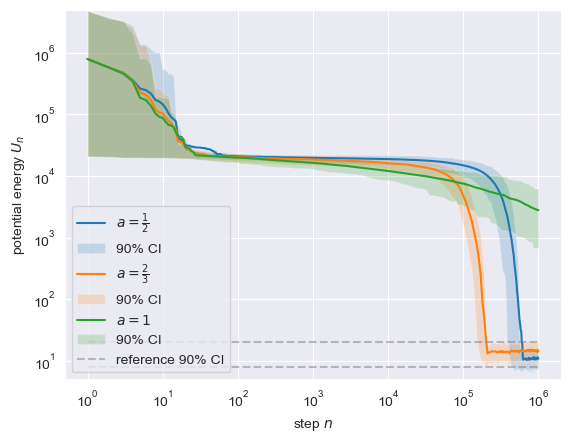

In [42]:
for a, a_l, pes in [
    (1/2, r"\frac{1}{2}", pes_rwm["pes1_2"]), 
    (2/3, r"\frac{2}{3}", pes_rwm["pes2_3"]), 
    (1, "1", pes_rwm["pes1"])
]:
    pes -= pe_offset

    pes_mean= pes.mean(axis=0)
    ci_l = jnp.quantile(pes, 0.05, axis=0)
    ci_u = jnp.quantile(pes, 0.95, axis=0)
    
    plt.plot(ns, pes_mean, label=rf"$a={a_l}$")
    plt.fill_between(ns, ci_l, ci_u, alpha=0.2, label="90% CI")
    
ci_ref_l = reference_draws_df["potential_energy"].quantile(0.05) - pe_offset
ci_ref_u = reference_draws_df["potential_energy"].quantile(0.95) - pe_offset
# plt.fill_between(ns, ci_l, ci_u, color="gray", alpha=0.2, label="90% CI")
# plt.plot(ns, 1 / jnp.sqrt(ns), "--", color="gray", label=r"$n^{-\frac{1}{2}}$")
plt.hlines([ci_ref_l, ci_ref_u], 1, 1e6, linestyles="--", color="gray", alpha=0.5, label="reference 90% CI")

plt.xlabel(r"step $n$")
plt.ylabel(r"potential energy $U_n$")

plt.legend(loc="lower left")
plt.ylim(5, 5e6)

plt.semilogy()
plt.semilogx()

plt.savefig(svg_dir + "rwm-pe-lr-diamonds.svg", format="svg")
# plt.savefig(png_dir + "rwm-pe-lr-kidiq.png", format="png", dpi=300)

In [43]:
pes_sss = dict(
    pes1 = jnp.stack(list(open_pes("sss", "1"))),
    pes2_3 = jnp.stack(list(open_pes("sss", "2_3"))),
    pes1_2 = jnp.stack(list(open_pes("sss", "1_2"))),
)
print(pes_sss["pes1_2"].min())

-3282.1887


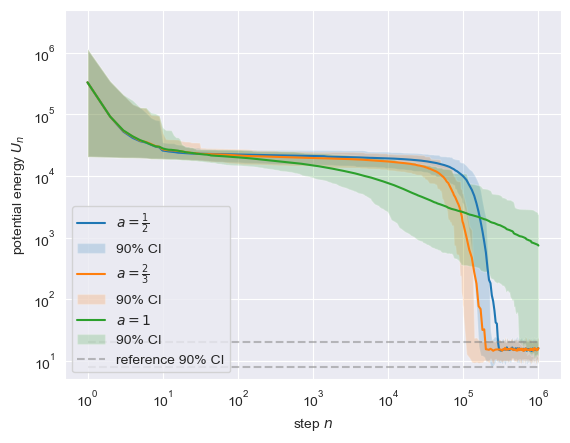

In [44]:
for a, a_l, pes in [
    (1/2, r"\frac{1}{2}", pes_sss["pes1_2"]), 
    (2/3, r"\frac{2}{3}", pes_sss["pes2_3"]), 
    (1, "1", pes_sss["pes1"])
]:
    pes -= pe_offset

    pes_mean= pes.mean(axis=0)
    ci_l = jnp.quantile(pes, 0.05, axis=0)
    ci_u = jnp.quantile(pes, 0.95, axis=0)
    
    plt.plot(ns, pes_mean, label=rf"$a={a_l}$")
    plt.fill_between(ns, ci_l, ci_u, alpha=0.2, label="90% CI")
    
ci_ref_l = reference_draws_df["potential_energy"].quantile(0.05) - pe_offset
ci_ref_u = reference_draws_df["potential_energy"].quantile(0.95) - pe_offset
# plt.fill_between(ns, ci_l, ci_u, color="gray", alpha=0.2, label="90% CI")
# plt.plot(ns, 1 / jnp.sqrt(ns), "--", color="gray", label=r"$n^{-\frac{1}{2}}$")
plt.hlines([ci_ref_l, ci_ref_u], 1, 1e6, linestyles="--", color="gray", alpha=0.5, label="reference 90% CI")

plt.xlabel(r"step $n$")
plt.ylabel(r"potential energy $U_n$")

plt.legend(loc="lower left")
plt.ylim(5, 5e6)

plt.semilogy()
plt.semilogx()

plt.savefig(svg_dir + "sss-pe-lr-diamonds.svg", format="svg")
# plt.savefig(png_dir + "rwm-pe-lr-kidiq.png", format="png", dpi=300)   

In [132]:
def open_eccs(algo, decay):
    for i in range(100):
        with open(f"{os.environ['MCMC_WORKDIR']}/python/mcmc_runs/lr_decay/diamonds/{algo}/{decay}/run{i}.pkl", "rb") as f:
            states = pickle.load(f)
            eccs = jax.vmap(get_ecc)(*jax.tree.leaves(states.z))
            yield eccs

In [136]:
eccs_sss = dict(
    eccs1 = jnp.stack(list(open_eccs("sss", "1"))),
    eccs2_3 = jnp.stack(list(open_eccs("sss", "2_3"))),
    eccs1_2 = jnp.stack(list(open_eccs("sss", "1_2"))),
)
print(eccs_sss["eccs1_2"].min())

0.6540532


[]

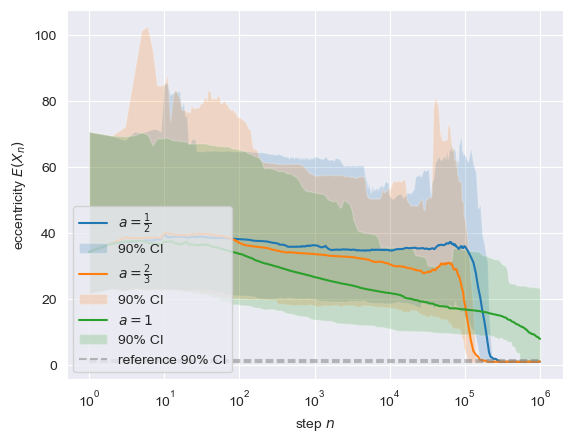

In [140]:
for a, a_l, eccs in [
    (1/2, r"\frac{1}{2}", eccs_sss["eccs1_2"]), 
    (2/3, r"\frac{2}{3}", eccs_sss["eccs2_3"]), 
    (1, "1", eccs_sss["eccs1"])
]:
    eccs_mean= eccs.mean(axis=0)
    ci_l = jnp.quantile(eccs, 0.05, axis=0)
    ci_u = jnp.quantile(eccs, 0.95, axis=0)
    
    plt.plot(ns, eccs_mean, label=rf"$a={a_l}$")
    plt.fill_between(ns, ci_l, ci_u, alpha=0.2, label="90% CI")
    
ci_ref_l = jnp.quantile(ref_eccs, 0.05)
ci_ref_u = jnp.quantile(ref_eccs, 0.95)
plt.hlines([ci_ref_l, ci_ref_u], 1, 1e6, linestyles="--", color="gray", alpha=0.5, label="reference 90% CI")

plt.xlabel(r"step $n$")
plt.ylabel(r"eccentricity $E(X_n)$")

plt.legend(loc="lower left")
# plt.ylim(5, 5e6)

# plt.semilogy()
plt.semilogx()

# plt.savefig(svg_dir + "sss-pe-lr-diamonds.svg", format="svg")
# plt.savefig(png_dir + "rwm-pe-lr-kidiq.png", format="png", dpi=300)   

### 2.3.3 Adaptation


In [135]:
def open_diffs(algo, decay):
    for i in range(100):
        with open(f"{os.environ['MCMC_WORKDIR']}/python/mcmc_runs/lr_decay/diamonds/{algo}/{decay}/run{i}.pkl", "rb") as f:
            states = pickle.load(f)
            yield states.as_change

In [136]:
diffs_rwm = dict(
    diffs1 = jnp.stack(list(open_diffs("rwm", "1"))), 
    diffs2_3 = jnp.stack(list(open_diffs("rwm", "2_3"))), 
    diffs1_2 = jnp.stack(list(open_diffs("rwm", "1_2"))), 
)
print(diffs_rwm["diffs1_2"].max())

343.49084


[]

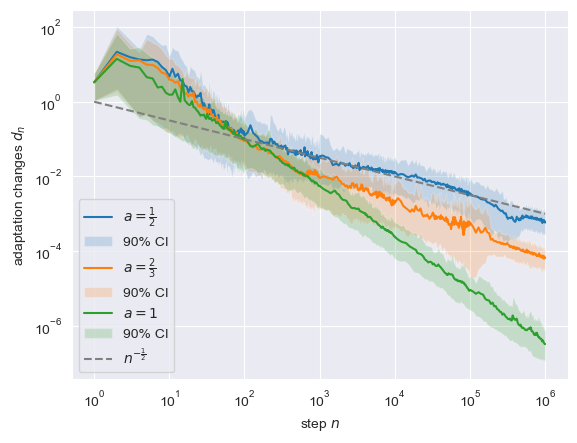

In [137]:
for a, a_l, diffs in [
    (1/2, r"\frac{1}{2}", diffs_rwm["diffs1_2"]), 
    (2/3, r"\frac{2}{3}", diffs_rwm["diffs2_3"]), 
    (1, "1", diffs_rwm["diffs1"])
]:

    diffs_mean= diffs.mean(axis=0)
    ci_l = jnp.quantile(diffs, 0.05, axis=0)
    ci_u = jnp.quantile(diffs, 0.95, axis=0)
    
    plt.plot(ns, diffs_mean, label=rf"$a={a_l}$")
    plt.fill_between(ns, ci_l, ci_u, alpha=0.2, label="90% CI")
    
plt.plot(ns, 1 / jnp.sqrt(ns), "--", color="gray", label=r"$n^{-\frac{1}{2}}$")

plt.xlabel(r"step $n$")
plt.ylabel(r"adaptation changes $d_n$")

plt.legend(loc="lower left")

plt.semilogy()
plt.semilogx()

# plt.savefig(svg_dir + "rwm-adaptation-lr-diamonds.svg", format="svg")
# plt.savefig(png_dir + "rwm-adaptation-lr-diamonds.png", format="png", dpi=300)

In [48]:
# diffs_sss = dict(
#     diffs1 = jax.lax.map(lambda r_key: get_sss_a_diffs(r_key, 1), r_keys),
#     diffs2_3 = jax.lax.map(lambda r_key: get_sss_a_diffs(r_key, 2/3), r_keys),
#     diffs1_2 = jax.lax.map(lambda r_key: get_sss_a_diffs(r_key, 1/2), r_keys),
# )
# 
# print(jnp.abs(diffs_sss["diffs1_2"]).max())

In [49]:
diffs_sss = dict(
    diffs1 = jnp.stack(list(open_diffs("sss", "1"))), 
    diffs2_3 = jnp.stack(list(open_diffs("sss", "2_3"))), 
    diffs1_2 = jnp.stack(list(open_diffs("sss", "1_2"))), 
)
print(diffs_sss["diffs1_2"].max())

217.74706


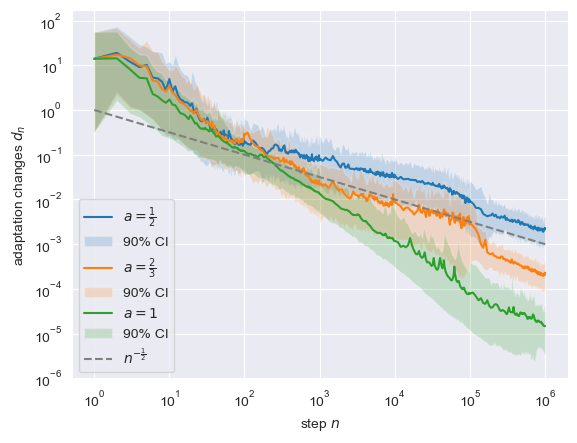

In [50]:
for a, a_l, diffs in [
    (1/2, r"\frac{1}{2}", diffs_sss["diffs1_2"]), 
    (2/3, r"\frac{2}{3}", diffs_sss["diffs2_3"]), 
    (1, "1", diffs_sss["diffs1"])
]:
    diffs_mean= diffs.mean(axis=0)
    ci_l = jnp.quantile(diffs, 0.05, axis=0)
    ci_u = jnp.quantile(diffs, 0.95, axis=0)
    
    plt.plot(ns, diffs_mean, label=rf"$a={a_l}$")
    plt.fill_between(ns, ci_l, ci_u, alpha=0.2, label="90% CI")

plt.plot(ns, 1 / jnp.sqrt(ns), "--", color="gray", label=r"$n^{-\frac{1}{2}}$")

plt.xlabel(r"step $n$")
plt.ylabel(r"adaptation changes $d_n$")

plt.legend(loc="lower left")

plt.semilogy()
plt.semilogx()

plt.savefig(svg_dir + "sss-adaptation-lr-diamonds.svg", format="svg")
# plt.savefig(png_dir + "sss-adaptation-lr-diamonds.png", format="png", dpi=300).

# 3. Evaluation

## 3.1. Load run

In [47]:
import pickle
runs_dir = f"{os.environ['MCMC_WORKDIR']}/python/mcmc_runs/w_eval/diamonds"

def open_cummeans(algo):

    for run_key in range(100):
        with open(f"{runs_dir}/{algo}/run{run_key}.pkl", "rb") as f:
            mcmc = pickle.load(f)
        posterior_samples = mcmc.get_samples()

        fs = jax.vmap(get_intercept)(**posterior_samples)
        f_cummean = jnp.cumsum(fs) / jnp.cumsum(jnp.ones_like(fs))
        yield f_cummean
    
cummeans = dict(
    arwm = jnp.stack(list(open_cummeans("rwm"))), 
    asss = jnp.stack(list(open_cummeans("sss"))), 
    nuts = jnp.stack(list(open_cummeans("nuts"))), 
)

In [48]:
palette = {
    "arwm": sns.color_palette("deep")[3],
    "asss": sns.color_palette("deep")[4],
    "nuts": sns.color_palette("deep")[5],
}

In [49]:
ns = jnp.arange(10000) + 1

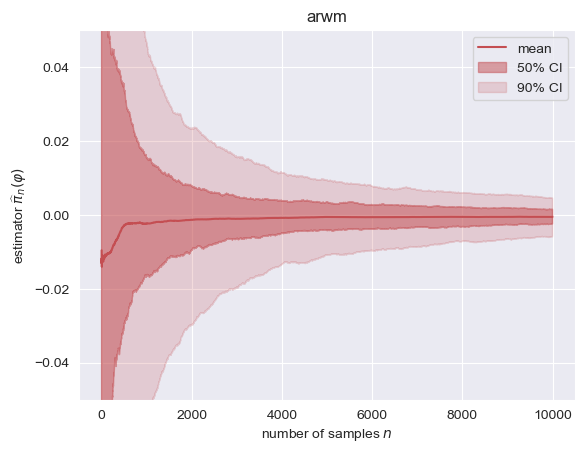

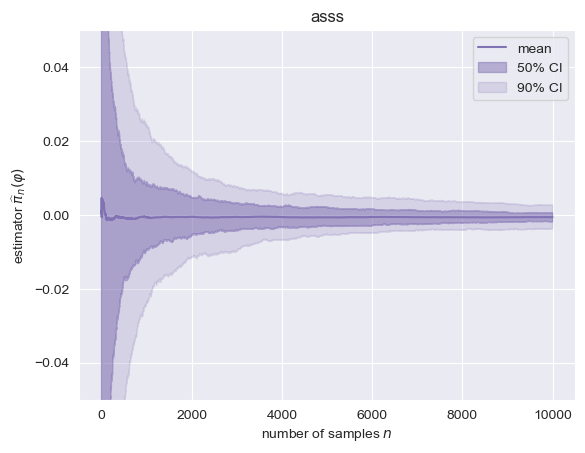

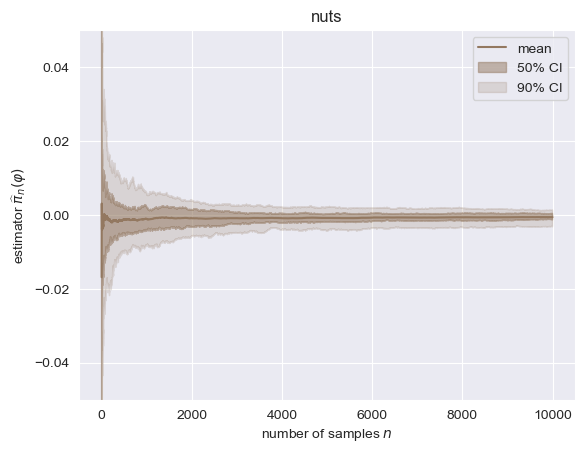

In [50]:
for algo, f_cummean in cummeans.items():
    bias = f_cummean.mean(axis=0) - ref_intercept
    ci_low = jnp.quantile(f_cummean, 0.25, axis=0) - ref_intercept
    ci_upp = jnp.quantile(f_cummean, 0.75, axis=0) - ref_intercept
    ci_l = jnp.quantile(f_cummean, 0.05, axis=0) - ref_intercept
    ci_u = jnp.quantile(f_cummean, 0.95, axis=0) - ref_intercept
    
    plt.figure()
    plt.title(algo)
    plt.plot(ns, bias, label="mean", color=palette[algo])
    # plt.plot(ns, std, label=algo + " std", color=palette[algo])
    plt.fill_between(ns, ci_low, ci_upp, alpha=0.5, label="50% CI", color=palette[algo])
    plt.fill_between(ns, ci_l, ci_u, alpha=0.2, label="90% CI", color=palette[algo])
    plt.ylim(-.05, 0.05)
    plt.ylabel(r"estimator $\widehat{\pi}_n(\varphi) $")
    plt.xlabel(r"number of samples $n$")
    plt.legend(loc="upper right")
    plt.savefig(svg_dir + f"{algo}-phi-eval-diamonds.svg", format="svg")

# plt.hlines(ref_intercept, 0, 10000, color="gray", linestyle="--", label="ref")


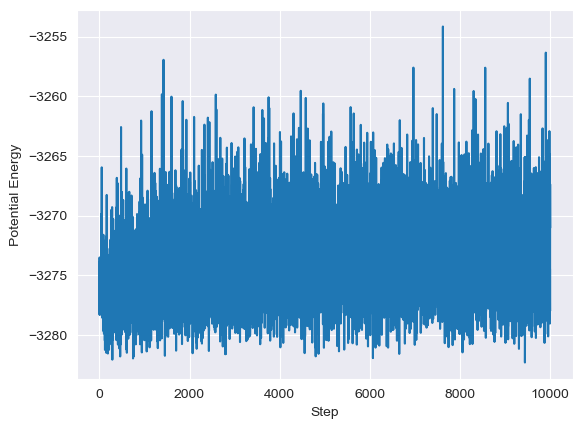

In [143]:
plt.plot(extra_fields["potential_energy"])
plt.xlabel("Step")
plt.ylabel("Potential Energy")
# plt.semilogy()
plt.show()

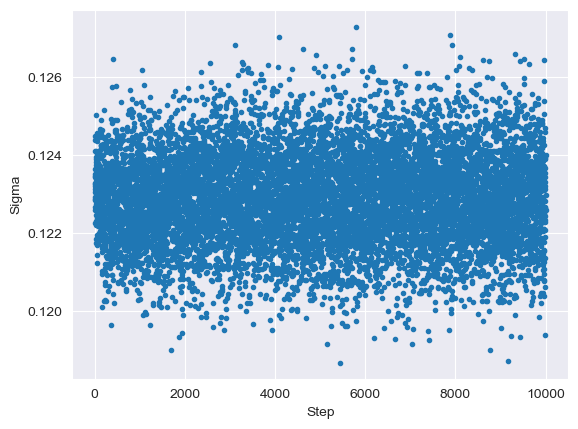

In [144]:
plt.plot(posterior_samples["sigma"], '.')
plt.xlabel("Step")
plt.ylabel("Sigma")
plt.show()

In [ ]:
posterior_samples_df = pd.DataFrame({
    k: v
    for key, vals in posterior_samples.items()
    for k, v in ([(key, vals)] if vals.ndim==1 else zip([f"{key}[{i+1}]" for i in range(vals.shape[-1])], vals.T))
})

param_list = posterior_samples_df.columns

In [146]:
posterior_samples_df["potential_energy"] = extra_fields["potential_energy"]
posterior_samples_df["step"] = posterior_samples_df.index * mcmc.thinning

## 3.2. Compare

In [148]:
combined_df = pd.concat([
    reference_draws_df.assign(source = "reference"),
    posterior_samples_df.assign(source = "samples"),
])
# combined_df

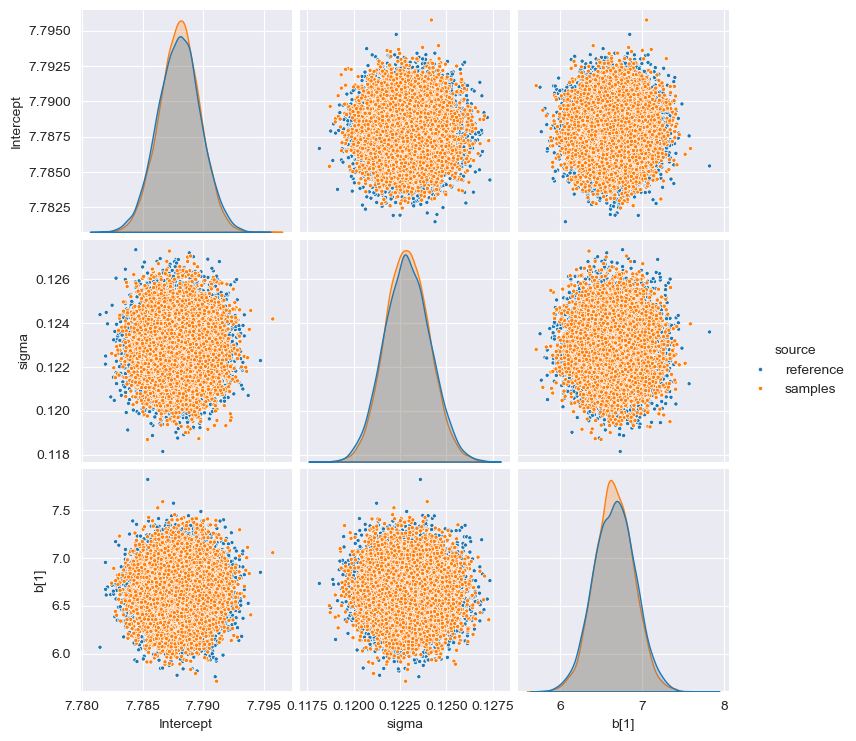

In [150]:
sns.pairplot(combined_df, hue="source", markers=".", vars=["Intercept", "sigma", "b[1]"])
plt.show()

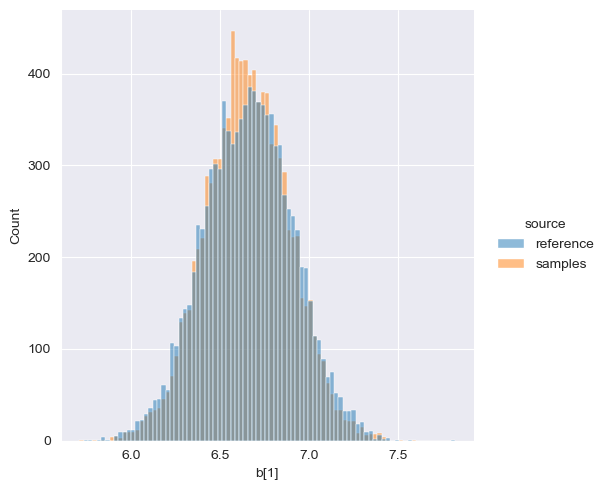

In [151]:
sns.displot(combined_df, x="b[1]", hue="source")
plt.show()

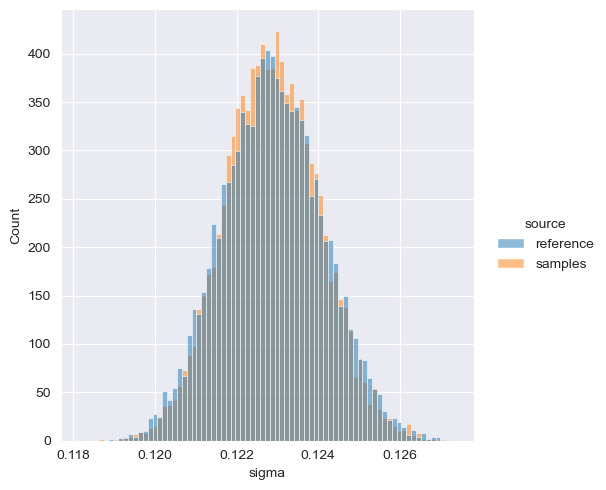

In [152]:
sns.displot(combined_df, x="sigma", hue="source")
plt.show()

In [205]:
ref_intercepts, ref_bs, ref_sigmas = jax.tree.leaves(reference_draws)
intercepts, bs, sigmas = jax.tree.leaves(posterior_samples)

x = jnp.concat(
    [
        ref_intercepts[:, None],
        ref_bs,
        jnp.log(ref_sigmas)[:, None],
    ],
    axis=1
)

y = jnp.concat(
    [
        intercepts[:, None],
        bs,
        jnp.log(sigmas)[:, None],
    ],
    axis=1
)

In [206]:
from utils.evaluation import pth_moment_rmse, wasserstein_dist11_p, mmd2_unbiased

### 3.2.1. Moments

RMSE of sampled moments of interest compared to a reference posterior moments

In [196]:
p = 2

pth_moments = combined_df.groupby("source").aggregate(lambda vals: np.mean(vals**p)).transpose().rename_axis(f"E[|X|^{p}]")
pth_moments["diff (%)"] = np.abs(pth_moments["reference"] - pth_moments["samples"])/(pth_moments["reference"])*100

pth_moments

source,reference,samples,diff (%)
E[|X|^2],,,
b[1],44.417422,4.434343e+01,1.665763e-01
b[2],40.598356,4.053232e+01,1.626598e-01
b[3],22.040444,2.200439e+01,1.635959e-01
b[4],2.113180,2.117645e+00,2.112673e-01
b[5],0.018108,1.804744e-02,3.350777e-01
b[6],0.001659,1.636664e-03,1.353074e+00
b[7],0.000552,5.475464e-04,8.921564e-01
b[8],0.000024,2.153354e-05,8.907888e+00
b[9],0.197932,1.978024e-01,6.548857e-02


In [207]:
%%time
pth_moment_rmse(x, y)

CPU times: user 112 μs, sys: 63 μs, total: 175 μs
Wall time: 109 μs


Array(0.02198016, dtype=float32)

## 3.2.2. Wasserstein-1 Distance

$$ \mathcal{W}(u, v) = \inf_{\xi \in \mathcal{C} (u, v)} \int \| x-y \|_2 \xi (dx,dy) $$

In [208]:
%%time
print(wasserstein_dist11_p(x, y))

CPU times: user 15.9 s, sys: 4.45 s, total: 20.4 s
Wall time: 20.7 s


0.1221949624983834

## 3.3. Maximum Mean Discrepancy

Given a symmetric, positive-definite kernel kernel $k(\cdot,\cdot): \mathcal{X} \times \mathcal{X} \to \mathbb{R}$,
the MMD between distributions $P$ and $Q$ is given by

$$ MMD(P, Q)^2 = \int_{\mathcal{X} \times \mathcal{X}} k(x, x') P(dx)P(dx') + \int_{\mathcal{X} \times \mathcal{X}} k(y, y') Q(dy)Q(dy') - 2\int_{\mathcal{X} \times \mathcal{X}} k(x, y) P(dx)Q(dy) $$

Unbiased estimator:

$$ MMD(\widehat{P}_n, \widehat{Q}_m)^2 = \frac{1}{n(n-1)}\sum_{i \neq i'}k(x_i, x_{i'}) + \frac{1}{m(m-1)}\sum_{j \neq j'}k(y_j, y_{j'}) - \frac{2}{mn}\sum_{i, j}k(x_i, y_j) $$

Usually Gaussian kernel is used with

$$ k(x,y) := \exp \left( -\gamma \| x-y \|^2 \right) $$.


In [210]:
%%time
print(mmd2_unbiased(x, y).item())

0.0005355882458388805
CPU times: user 7.5 s, sys: 257 ms, total: 7.75 s
Wall time: 1.68 s


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette(sns.color_palette("deep")[3:6])

In [30]:
df_eval = pd.concat([
    pd.read_csv(
        f"{os.environ['MCMC_WORKDIR']}/python/mcmc_runs/w_eval/diamonds/eval_{algo}.csv",
        usecols=["rng_seed", "rmse_means", "wasserstein", "mmd"]
    ).assign(algorithm=(algo if algo=="nuts" else "a"+algo))
    for algo in ["rwm", "sss", "nuts"]
]).set_index(["algorithm", "rng_seed"])



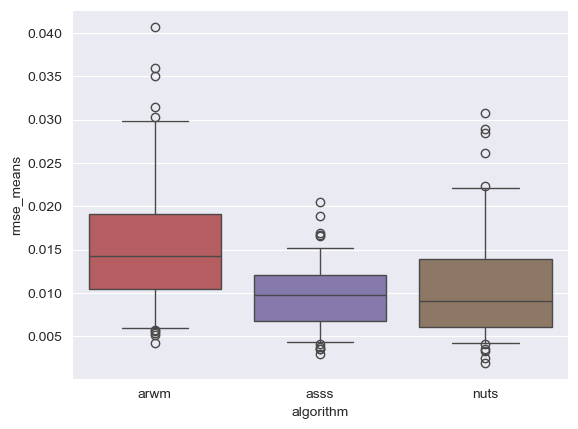

In [43]:
sns.boxplot(df_eval, x="algorithm", y="rmse_means", hue="algorithm", whis=[5,95])
# sns.stripplot(df_eval, x="algorithm", y="moment_rmse", size=3, hue="algorithm", alpha=0.5)
plt.savefig(svg_dir + "rmse-eval-diamonds.svg", format="svg")

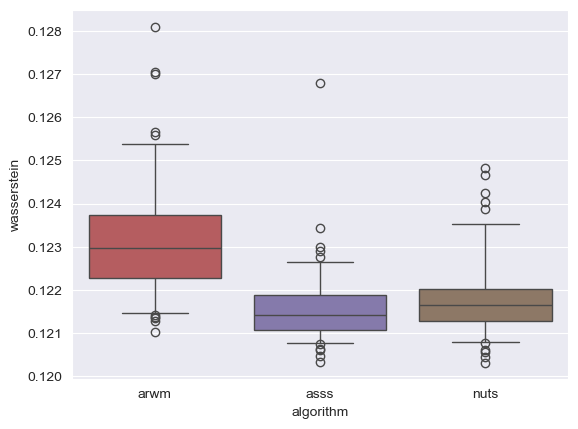

In [44]:
sns.boxplot(df_eval, x="algorithm", y="wasserstein", hue="algorithm", whis=[5,95])
# sns.stripplot(df_eval, x="algorithm", y="moment_rmse", size=3, hue="algorithm", alpha=0.5)
plt.savefig(svg_dir + "wasserstein-eval-diamonds.svg", format="svg")

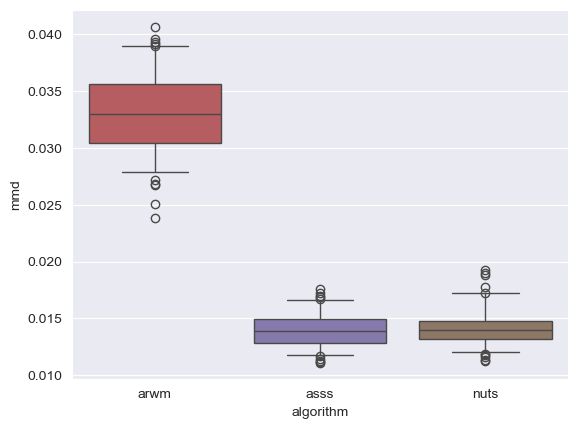

In [46]:
sns.boxplot(df_eval, x="algorithm", y="mmd", hue="algorithm", whis=[5,95])
# sns.stripplot(df_eval, x="algorithm", y="moment_rmse", size=3, hue="algorithm", alpha=0.5)
plt.savefig(svg_dir + "mmd-eval-diamonds.svg", format="svg")

In [31]:
df_eval_agg = df_eval.groupby(by=["algorithm"]).agg(["mean", "std"])
df_eval_agg

rmse_means           wasserstein                 mmd          
                mean       std        mean       std      mean       std
algorithm                                                               
arwm        0.015664  0.007396    0.123147  0.001258  0.033099  0.003463
asss        0.009635  0.003629    0.121571  0.000778  0.013965  0.001473
nuts        0.010645  0.006127    0.121828  0.000856  0.014189  0.001629